# <div style="text-align: right"> FIT 1043 Introduction to Data Science</div>


## <div style="text-align: right"> Assignment 1</div>

<div style="text-align: right"> Lai Li Xuan<br> 32889801</div>

***

# Introduction

This assignment contain three different datasets which is related to life expectancy, population and GDP of 2019. The objective of this assignment is to extract useful and meaningful information from the related dataframe and get to know more about life expectancy, gdp and population of each country. <br>
Data cleaning and data describing is done before annalysing the data. While analysing the data, data visualizing tools such as graph are used for better data visualization.

# Importing Libraries

Importing pandas, which is an open source data analysis tool for the python programming language. The purpose of importing this library is that we would like to use the data structure such as DataFrame and it's associated functions such as reading from CSV files, editing dataframes and so on. <br>
Importing matplotlib, it is a comprehensive library for creating static, animated, and interactive visualizations in Python. It can be used to create publication quality plots and make interactive figures that can zoom, pan, update.<br>
Importing numpy, which is a Python library that provides a multidimensional array object, various derived objects and an assortment of routines for fast operations.

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

# Reading Files

Using function .read_csv() from pandas library to read files from the data folder. The files read are '2019-GDP.csv', '2020-Population.csv' and 'LifeExpectancyData-v2.csv', first 5 rows and number of rows and columns are shown after files were read.

### '2019-GDP.csv' :

In [4]:
GDP2019 = pd.read_csv('2019-GDP.csv', skiprows = 4)
GDP2019.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,USA,1,NaN,United States,"21,427,700",NaN
1,CHN,2,NaN,China,"14,342,903",NaN
2,JPN,3,NaN,Japan,"5,081,770",NaN
3,DEU,4,NaN,Germany,"3,845,630",NaN
4,IND,5,NaN,India,"2,875,142",NaN


In [5]:
GDP2019.shape

(240, 6)

There are 240 rows and 6 columns in this dataset, first 4 rows are skipped.

### '2020-Population.csv' :

In [6]:
Population2020 = pd.read_csv('2020-Population.csv', skiprows = 16)
Population2020.head()

,Index,Variant,"Region, subregion, country or area *",Notes,Country code,Type,Parent code,1950,1951,1952,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1,Estimates,WORLD,NaN,900,World,0,2 536 431,2 584 034,2 630 862,...,7 041 194,7 125 828,7 210 582,7 295 291,7 379 797,7 464 022,7 547 859,7 631 091,7 713 468,7 794 799
1,2,Estimates,UN development groups,a,1803,Label/Separator,900,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,3,Estimates,More developed regions,b,901,Development Group,1803,814 819,824 004,833 720,...,1 239 557,1 244 115,1 248 454,1 252 615,1 256 622,1 260 479,1 264 146,1 267 559,1 270 630,1 273 304
3,4,Estimates,Less developed regions,c,902,Development Group,1803,1 721 612,1 760 031,1 797 142,...,5 801 637,5 881 713,5 962 129,6 042 676,6 123 175,6 203 543,6 283 713,6 363 532,6 442 838,6 521 494
4,5,Estimates,Least developed countries,d,941,Development Group,902,195 428,199 180,203 015,...,856 471,876 867,897 793,919 223,941 131,963 520,986 385,1 009 691,1 033 389,1 057 438


In [7]:
Population2020.shape

(289, 78)

There are 289 rows and 78 columns in this dataset, first 16 rows are skipped

### 'LifeExpectancyData-v2.csv' :

In [8]:
life_expectancy_data = pd.read_csv('LifeExpectancyData-v2.csv')
life_expectancy_data.head()

,country,Year,Status,Life expectancy,infant deaths,Adult Mortality,BMI,Alcohol consumption,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,62,263.0,19.1,0.01,65.0,1154,6.0,65.0,0.1,0.479,10.1
1,Afghanistan,2014,Developing,59.9,64,271.0,18.6,0.01,62.0,492,58.0,62.0,0.1,0.476,10.0
2,Afghanistan,2013,Developing,59.9,66,268.0,18.1,0.01,64.0,430,62.0,64.0,0.1,0.470,9.9
3,Afghanistan,2012,Developing,59.5,69,272.0,17.6,0.01,67.0,2787,67.0,67.0,0.1,0.463,9.8
4,Afghanistan,2011,Developing,59.2,71,275.0,17.2,0.01,68.0,3013,68.0,68.0,0.1,0.454,9.5


In [9]:
life_expectancy_data.shape

(2938, 15)

There are 2938 rows and 15 columns in this dataset.

 # Wrangle the data
 Renaming the columns to access the data needed easier, and keeping the columns needed. For the column 'Country', only South East Asian countries, including East Timor are needed, name will be adjust to the same for the consistency. 

Merging the life expectancy related dataframe, GDP related dataframe and Population related dataframe on the same column 'Country'. Column 'perCapitaGDP' is added into the dataFrame.
perCapitaGDP = GDP / Population.

In [10]:
# selecting country needed
country_needed1 = ('Brunei Darussalam','Myanmar','Cambodia','Timor-Leste','Indonesia',
                  'Lao People\'s Democratic Republic','Malaysia','Philippines','Singapore','Thailand','Viet Nam')

Tuple is created to store the name of the countries needed as tuple is immutable and have fixed size, we can also find elements in tuple as it won't change the tuple. 

#### Life_expectancy related DataFrame: 

In [11]:
life_expectancy_data = life_expectancy_data[life_expectancy_data['country'].isin(country_needed1)]
life_expectancy_data

,country,Year,Status,Life expectancy,infant deaths,Adult Mortality,BMI,Alcohol consumption,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,Income composition of resources,Schooling
368,Brunei Darussalam,2015,Developing,77.7,0,78.0,41.2,NaN,99.0,4,99.0,99.0,0.1,0.864,14.9
369,Brunei Darussalam,2014,Developing,77.6,0,8.0,4.2,0.01,99.0,1,99.0,99.0,0.1,0.863,15.0
370,Brunei Darussalam,2013,Developing,77.1,0,84.0,39.2,0.01,98.0,0,99.0,99.0,0.1,0.860,14.9
371,Brunei Darussalam,2012,Developing,78.3,0,79.0,38.2,0.01,99.0,1,99.0,99.0,0.1,0.852,14.4
372,Brunei Darussalam,2011,Developing,77.4,0,79.0,37.2,0.97,93.0,4,99.0,97.0,0.1,0.846,14.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885,Viet Nam,2004,Developing,74.2,29,136.0,1.9,2.86,94.0,217,96.0,96.0,0.2,0.601,11.0
2886,Viet Nam,2003,Developing,74.0,30,137.0,1.4,2.19,78.0,2297,96.0,99.0,0.2,0.592,10.9
2887,Viet Nam,2002,Developing,73.8,30,137.0,1.0,2.03,NaN,6755,92.0,75.0,0.2,0.584,10.7
2888,Viet Nam,2001,Developing,73.6,32,138.0,9.6,1.84,NaN,12058,96.0,96.0,0.1,0.576,10.6


In [12]:
# aggregating the data needed
groupby1 = {'Life expectancy ' : {'max','mean'}, ' BMI ' : 'mean', 'Income composition of resources' : 'mean', 
            'Schooling' : 'mean'}

In [13]:
life_expectancy = life_expectancy_data.groupby(['country','Status']).agg(groupby1).reset_index()
life_expectancy.columns = life_expectancy.columns.droplevel(1)
life_expectancy

,country,Status,Life expectancy,Life expectancy,BMI,Income composition of resources,Schooling
0,Brunei Darussalam,Developing,78.3,76.48750,29.71875,0.839375,14.10625
1,Cambodia,Developing,68.7,64.34375,15.36250,0.491938,9.87500
2,Indonesia,Developing,69.1,67.55625,19.95625,0.641437,11.61250
3,Lao People's Democratic Republic,Developing,65.7,62.38125,14.36250,0.515625,9.23125
4,Malaysia,Developing,75.0,73.75625,29.16875,0.749125,12.56250
5,Myanmar,Developing,66.6,64.20000,17.12500,0.488250,8.32500
6,Philippines,Developing,68.5,67.57500,19.18750,0.650438,11.54375
7,Singapore,Developed,87.0,81.47500,25.90625,0.866875,13.98125
8,Thailand,Developing,74.9,73.08125,21.59375,0.694688,12.55000
9,Timor-Leste,Developing,68.3,64.75625,14.55000,0.517625,10.70000


In [14]:
# Proper renaming and indexing of the columns
life_expectancy.columns = ['Country', 'Status', 'max_LifeExpectancy', 'mean_LifeExpectancy', 'mean_BMI', 
                           'mean_IncomeCompositionOfResources', 'mean_Schooling']
life_expectancy

,Country,Status,max_LifeExpectancy,mean_LifeExpectancy,mean_BMI,mean_IncomeCompositionOfResources,mean_Schooling
0,Brunei Darussalam,Developing,78.3,76.48750,29.71875,0.839375,14.10625
1,Cambodia,Developing,68.7,64.34375,15.36250,0.491938,9.87500
2,Indonesia,Developing,69.1,67.55625,19.95625,0.641437,11.61250
3,Lao People's Democratic Republic,Developing,65.7,62.38125,14.36250,0.515625,9.23125
4,Malaysia,Developing,75.0,73.75625,29.16875,0.749125,12.56250
5,Myanmar,Developing,66.6,64.20000,17.12500,0.488250,8.32500
6,Philippines,Developing,68.5,67.57500,19.18750,0.650438,11.54375
7,Singapore,Developed,87.0,81.47500,25.90625,0.866875,13.98125
8,Thailand,Developing,74.9,73.08125,21.59375,0.694688,12.55000
9,Timor-Leste,Developing,68.3,64.75625,14.55000,0.517625,10.70000


#### GDP_2019 related DataFrame: 

In [15]:
# renaming GDP_2019's column
GDP_2019 = GDP2019.rename(
    columns = {
        'Unnamed: 3' : 'Country',
        'Unnamed: 4' : 'GDP_2019'
    })

In [16]:
# seleccting country needed
country_needed2 = ('Brunei Darussalam','Myanmar','Cambodia','Timor-Leste','Indonesia',
                  'Lao PDR','Malaysia','Philippines','Singapore','Thailand','Vietnam')

Another tuple is created to select the country needed as in this dataset, it has slightly different country name, but it will be changed afterwards to keep the consistency of data. 

In [17]:
GDP_2019 = GDP_2019[GDP_2019['Country'].isin(country_needed2)]
country_GDP = GDP_2019[['Country', 'GDP_2019']].reset_index().drop('index', axis = 'columns')
country_GDP

,Country,GDP_2019
0,Indonesia,"1,119,191"
1,Thailand,"543,650"
2,Philippines,"376,796"
3,Singapore,"372,063"
4,Malaysia,"364,702"
5,Vietnam,"261,921"
6,Myanmar,"76,086"
7,Cambodia,"27,089"
8,Lao PDR,"18,174"
9,Brunei Darussalam,"13,469"


In [18]:
# renaming country name to the same as other dataframe
country_GDP['Country'] = country_GDP['Country'].replace(
         ['Vietnam','Lao PDR'], 
         ['Viet Nam', 'Lao People\'s Democratic Republic'])
country_GDP

,Country,GDP_2019
0,Indonesia,"1,119,191"
1,Thailand,"543,650"
2,Philippines,"376,796"
3,Singapore,"372,063"
4,Malaysia,"364,702"
5,Viet Nam,"261,921"
6,Myanmar,"76,086"
7,Cambodia,"27,089"
8,Lao People's Democratic Republic,"18,174"
9,Brunei Darussalam,"13,469"


#### Population2020 related DataFrame:

In [19]:
Population2020 = Population2020.rename(
    columns = {
        Population2020.columns[2]: 'Country'
    })

In [20]:
Population2020 = Population2020[Population2020['Country'].isin(country_needed1)]
Population2020 = Population2020[['Country', '2019']].reset_index().drop('index', axis = 'columns')
Population = Population2020.rename(
    columns = {
        '2019': 'Population_2019'
    })
Population

,Country,Population_2019
0,Brunei Darussalam,433
1,Cambodia,16 487
2,Indonesia,270 626
3,Lao People's Democratic Republic,7 169
4,Malaysia,31 950
5,Myanmar,54 045
6,Philippines,108 117
7,Singapore,5 804
8,Thailand,69 626
9,Timor-Leste,1 293


### Merging the Files:

In [21]:
# merging life_expectancy and country_GDP
df = life_expectancy.merge(country_GDP, how = 'inner', on = 'Country')
df

,Country,Status,max_LifeExpectancy,mean_LifeExpectancy,mean_BMI,mean_IncomeCompositionOfResources,mean_Schooling,GDP_2019
0,Brunei Darussalam,Developing,78.3,76.48750,29.71875,0.839375,14.10625,"13,469"
1,Cambodia,Developing,68.7,64.34375,15.36250,0.491938,9.87500,"27,089"
2,Indonesia,Developing,69.1,67.55625,19.95625,0.641437,11.61250,"1,119,191"
3,Lao People's Democratic Republic,Developing,65.7,62.38125,14.36250,0.515625,9.23125,"18,174"
4,Malaysia,Developing,75.0,73.75625,29.16875,0.749125,12.56250,"364,702"
5,Myanmar,Developing,66.6,64.20000,17.12500,0.488250,8.32500,"76,086"
6,Philippines,Developing,68.5,67.57500,19.18750,0.650438,11.54375,"376,796"
7,Singapore,Developed,87.0,81.47500,25.90625,0.866875,13.98125,"372,063"
8,Thailand,Developing,74.9,73.08125,21.59375,0.694688,12.55000,"543,650"
9,Timor-Leste,Developing,68.3,64.75625,14.55000,0.517625,10.70000,"1,674"


In [22]:
# merging df and Population
merged_df = df.merge(Population, how = 'inner', on = 'Country')
merged_df

,Country,Status,max_LifeExpectancy,mean_LifeExpectancy,mean_BMI,mean_IncomeCompositionOfResources,mean_Schooling,GDP_2019,Population_2019
0,Brunei Darussalam,Developing,78.3,76.48750,29.71875,0.839375,14.10625,"13,469",433
1,Cambodia,Developing,68.7,64.34375,15.36250,0.491938,9.87500,"27,089",16 487
2,Indonesia,Developing,69.1,67.55625,19.95625,0.641437,11.61250,"1,119,191",270 626
3,Lao People's Democratic Republic,Developing,65.7,62.38125,14.36250,0.515625,9.23125,"18,174",7 169
4,Malaysia,Developing,75.0,73.75625,29.16875,0.749125,12.56250,"364,702",31 950
5,Myanmar,Developing,66.6,64.20000,17.12500,0.488250,8.32500,"76,086",54 045
6,Philippines,Developing,68.5,67.57500,19.18750,0.650438,11.54375,"376,796",108 117
7,Singapore,Developed,87.0,81.47500,25.90625,0.866875,13.98125,"372,063",5 804
8,Thailand,Developing,74.9,73.08125,21.59375,0.694688,12.55000,"543,650",69 626
9,Timor-Leste,Developing,68.3,64.75625,14.55000,0.517625,10.70000,"1,674",1 293


In [23]:
# removing ',' and ' ' of the data
merged_df['GDP_2019'] = merged_df['GDP_2019'].str.replace(',', '')
merged_df['Population_2019'] = merged_df['Population_2019'].str.replace(' ', '')

In [24]:
# convert the datatypes of GDP and POpulation_2019 to float
merged_df['GDP_2019'] = pd.to_numeric(merged_df['GDP_2019'],errors='ignore')
merged_df['Population_2019'] = pd.to_numeric(merged_df['Population_2019'],errors='ignore')
merged_df

,Country,Status,max_LifeExpectancy,mean_LifeExpectancy,mean_BMI,mean_IncomeCompositionOfResources,mean_Schooling,GDP_2019,Population_2019
0,Brunei Darussalam,Developing,78.3,76.48750,29.71875,0.839375,14.10625,13469,433
1,Cambodia,Developing,68.7,64.34375,15.36250,0.491938,9.87500,27089,16487
2,Indonesia,Developing,69.1,67.55625,19.95625,0.641437,11.61250,1119191,270626
3,Lao People's Democratic Republic,Developing,65.7,62.38125,14.36250,0.515625,9.23125,18174,7169
4,Malaysia,Developing,75.0,73.75625,29.16875,0.749125,12.56250,364702,31950
5,Myanmar,Developing,66.6,64.20000,17.12500,0.488250,8.32500,76086,54045
6,Philippines,Developing,68.5,67.57500,19.18750,0.650438,11.54375,376796,108117
7,Singapore,Developed,87.0,81.47500,25.90625,0.866875,13.98125,372063,5804
8,Thailand,Developing,74.9,73.08125,21.59375,0.694688,12.55000,543650,69626
9,Timor-Leste,Developing,68.3,64.75625,14.55000,0.517625,10.70000,1674,1293


In [25]:
# calculation of column 'perCapitaGDP' and adding into the dataframe
merged_df['GDP_2019'] = merged_df['GDP_2019'] * 1000000
merged_df['Population_2019'] = merged_df['Population_2019'] * 1000
merged_df['perCapitaGDP'] = merged_df['GDP_2019']/merged_df['Population_2019']
merged_df

,Country,Status,max_LifeExpectancy,mean_LifeExpectancy,mean_BMI,mean_IncomeCompositionOfResources,mean_Schooling,GDP_2019,Population_2019,perCapitaGDP
0,Brunei Darussalam,Developing,78.3,76.48750,29.71875,0.839375,14.10625,13469000000,433000,31106.235566
1,Cambodia,Developing,68.7,64.34375,15.36250,0.491938,9.87500,27089000000,16487000,1643.052102
2,Indonesia,Developing,69.1,67.55625,19.95625,0.641437,11.61250,1119191000000,270626000,4135.563471
3,Lao People's Democratic Republic,Developing,65.7,62.38125,14.36250,0.515625,9.23125,18174000000,7169000,2535.081601
4,Malaysia,Developing,75.0,73.75625,29.16875,0.749125,12.56250,364702000000,31950000,11414.773083
5,Myanmar,Developing,66.6,64.20000,17.12500,0.488250,8.32500,76086000000,54045000,1407.826811
6,Philippines,Developing,68.5,67.57500,19.18750,0.650438,11.54375,376796000000,108117000,3485.076352
7,Singapore,Developed,87.0,81.47500,25.90625,0.866875,13.98125,372063000000,5804000,64104.583046
8,Thailand,Developing,74.9,73.08125,21.59375,0.694688,12.55000,543650000000,69626000,7808.146382
9,Timor-Leste,Developing,68.3,64.75625,14.55000,0.517625,10.70000,1674000000,1293000,1294.663573


In [26]:
df = merged_df

# Decription of Files

After wrangling and merging the files, get to understand the files before analysing the data. Functions .shape, .columns and .describe( ) are used. 

In [27]:
df.shape

(11, 10)

In [28]:
# Describe numerical data
df[['max_LifeExpectancy','mean_BMI','mean_IncomeCompositionOfResources','mean_Schooling',
    'Population_2019','GDP_2019','perCapitaGDP']].describe()

,max_LifeExpectancy,mean_BMI,mean_IncomeCompositionOfResources,mean_Schooling,Population_2019,GDP_2019,perCapitaGDP
count,11.000000,11.000000,11.000000,11.000000,1.100000e+01,1.100000e+01,11.000000
mean,72.554545,19.828977,0.643858,11.454545,6.018291e+07,2.886195e+11,11968.207134
std,6.393804,6.206451,0.134771,1.835239,7.971137e+07,3.347960e+11,19344.372848
min,65.700000,11.187500,0.488250,8.325000,4.330000e+05,1.674000e+09,1294.663573
25%,68.400000,14.956250,0.516625,10.287500,6.486500e+06,2.263150e+10,2089.066851
50%,69.100000,19.187500,0.641437,11.543750,3.195000e+07,2.619210e+11,3485.076352
75%,75.500000,23.750000,0.721906,12.556250,8.304400e+07,3.744295e+11,9611.459733
max,87.000000,29.718750,0.866875,14.106250,2.706260e+08,1.119191e+12,64104.583046


- Highest max life expectancy among South East Asian countries is 87.00
- Highest mean BMI among South East Asian countries is 29.72
- Highest mean income composition of resources among South East Asian countries is 0.87
- Highest mean schooling among South East Asian countries is 14.11
- Highest population of 2019 among South East Asian countries is 270 million
- Highest GDP in 2019 among South East Asian countries is 1.12 trillion
- Highest perCapitaGDP among South East Asian countries is 64104

In [29]:
df[['Country','Status']].describe()

,Country,Status
count,11,11
unique,11,2
top,Brunei Darussalam,Developing
freq,1,10


- There are 11 unique country
- There are 2 unique status
- There are more number of country in developing status

# Question 1

Each country will be classified as developing or developed. In South East Asian population, there is only one country, Singapore is the developed country. 

In [30]:
df

,Country,Status,max_LifeExpectancy,mean_LifeExpectancy,mean_BMI,mean_IncomeCompositionOfResources,mean_Schooling,GDP_2019,Population_2019,perCapitaGDP
0,Brunei Darussalam,Developing,78.3,76.48750,29.71875,0.839375,14.10625,13469000000,433000,31106.235566
1,Cambodia,Developing,68.7,64.34375,15.36250,0.491938,9.87500,27089000000,16487000,1643.052102
2,Indonesia,Developing,69.1,67.55625,19.95625,0.641437,11.61250,1119191000000,270626000,4135.563471
3,Lao People's Democratic Republic,Developing,65.7,62.38125,14.36250,0.515625,9.23125,18174000000,7169000,2535.081601
4,Malaysia,Developing,75.0,73.75625,29.16875,0.749125,12.56250,364702000000,31950000,11414.773083
5,Myanmar,Developing,66.6,64.20000,17.12500,0.488250,8.32500,76086000000,54045000,1407.826811
6,Philippines,Developing,68.5,67.57500,19.18750,0.650438,11.54375,376796000000,108117000,3485.076352
7,Singapore,Developed,87.0,81.47500,25.90625,0.866875,13.98125,372063000000,5804000,64104.583046
8,Thailand,Developing,74.9,73.08125,21.59375,0.694688,12.55000,543650000000,69626000,7808.146382
9,Timor-Leste,Developing,68.3,64.75625,14.55000,0.517625,10.70000,1674000000,1293000,1294.663573


In [31]:
groupby1 = {'mean_LifeExpectancy' : 'mean', 'Population_2019' : 'mean'}
df1 = df.groupby('Status').agg(groupby1).reset_index()
df1 = df1.rename(
    columns = {
        'Population_2019':'mean_Population'
    })
df1

,Status,mean_LifeExpectancy,mean_Population
0,Developed,81.47500,5804000.0
1,Developing,68.89125,65620800.0


A grouped bar graph is showing the mean life expectancy and population for developed and developing countries. The reason why grouped bar graph is chosen for visualizing data is because we are comparing more than one data between different groups, and we can easily compare the data by simply looking at the height of each bar.

Text(0.5, 1.0, 'Mean Life Expectancy and Population of Developed and Developing Country')

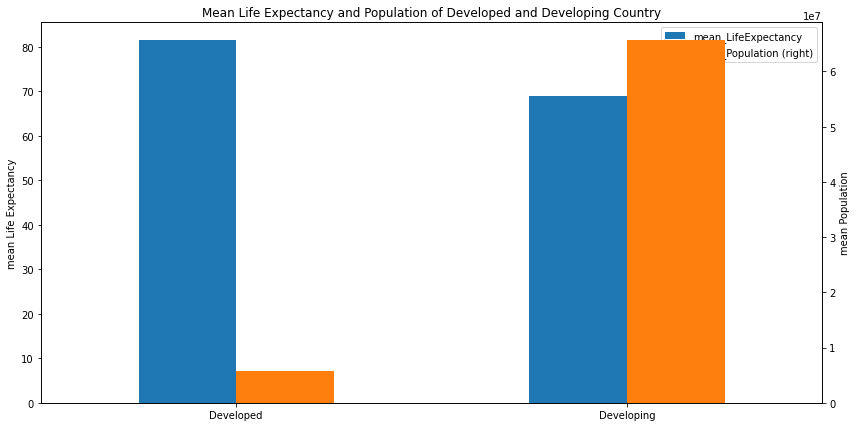

In [32]:
ax = df1.plot.bar(figsize = (14,7), secondary_y = 'mean_Population')
ax.set_xticklabels(df1['Status'], rotation = 0)
plt.xlabel('Status')
ax1, ax2 = plt.gcf().get_axes()
ax1.set_ylabel('mean Life Expectancy')
ax2.set_ylabel('mean Population')
plt.title('Mean Life Expectancy and Population of Developed and Developing Country')

From the above bar graph, we can see that developed country has higher mean life expectancy compared to the developing country, while developing country has higher population than developed country. 

# Question 2

Data from column 'Adult Mortality' of the original dataset is needed to plot the graph.

In [33]:
groupby = {'Adult Mortality' : 'mean'}

In [34]:
adult_mortality = life_expectancy_data.groupby('country').agg(groupby).reset_index()
adult_mortality = adult_mortality.rename(
    columns = 
    {'country' : 'Country'}
)
adult_mortality

,Country,Adult Mortality
0,Brunei Darussalam,67.0625
1,Cambodia,196.3750
2,Indonesia,166.5625
3,Lao People's Democratic Republic,197.1875
4,Malaysia,118.5625
5,Myanmar,154.3125
6,Philippines,217.9375
7,Singapore,62.0000
8,Thailand,160.3750
9,Timor-Leste,170.3750


In [35]:
# merging all the columns needed for plotting the graph into a new dataframe
df2 = df[['Country', 'Population_2019', 'mean_LifeExpectancy']]
df2 = df2.merge(adult_mortality, how = 'inner', on = 'Country')
df2

,Country,Population_2019,mean_LifeExpectancy,Adult Mortality
0,Brunei Darussalam,433000,76.48750,67.0625
1,Cambodia,16487000,64.34375,196.3750
2,Indonesia,270626000,67.55625,166.5625
3,Lao People's Democratic Republic,7169000,62.38125,197.1875
4,Malaysia,31950000,73.75625,118.5625
5,Myanmar,54045000,64.20000,154.3125
6,Philippines,108117000,67.57500,217.9375
7,Singapore,5804000,81.47500,62.0000
8,Thailand,69626000,73.08125,160.3750
9,Timor-Leste,1293000,64.75625,170.3750


A bar graph for each country with side-by-side bars for population, mean life expectancy, and adult mortality is created. The graph will be difficult to visualise due to big disparities in the numbers if they are sharing the same axis. <br>
Therefore, two y axis are plotted for different data range, data of mean life expectancy and adult mortality are sharing the same axis on the left side as they have smaller disparity in the numbers while data of population is using the axis on the right side of the graph.

Text(0.5, 1.0, 'Population, Mean Life Expectancy and Adult Mortality of Country')

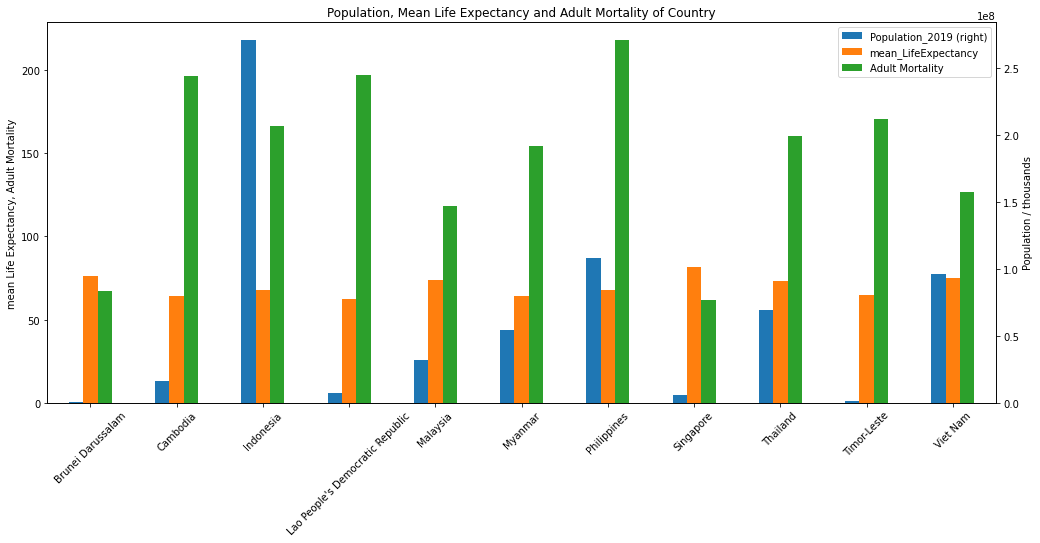

In [36]:
ax = df2.plot.bar(figsize = (17,7), secondary_y = 'Population_2019')
ax.set_xticklabels(df2['Country'],rotation = 45)
plt.xlabel('Country')
ax1, ax2 = plt.gcf().get_axes()
ax1.set_ylabel('mean Life Expectancy, Adult Mortality')
ax2.set_ylabel('Population / thousands')
plt.title('Population, Mean Life Expectancy and Adult Mortality of Country')

The data used for the graph may be misleading as we might fail to recognise the false statistics and data and it will cause the data to be less accurate. Besides, the three data comparing in this graph has a big disparities in numbers, even the problem is solved but it may cause misleading of the data and graph as the difference in intervals of data can cause difficulty in visualizing the data. For example, we can hardly see the bar of Population_2019 of Brunei Darussalam in the graph due to small value and the large disparity of the graph. 

# Question 3

Non-aggregated data from the original dataframe 'life_expetancy_data' is needed, and only data that related to Singapore is needed. 

In [37]:
df3 = life_expectancy_data

In [38]:
# extracting data only related to Singapore
sg = df3[df3['country'] == 'Singapore']
sg

,country,Year,Status,Life expectancy,infant deaths,Adult Mortality,BMI,Alcohol consumption,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,Income composition of resources,Schooling
2313,Singapore,2015,Developed,83.1,0,55.0,33.2,1.79,96.0,0,96.0,96.0,0.1,0.924,15.4
2314,Singapore,2014,Developed,82.9,0,56.0,32.9,1.83,96.0,0,96.0,96.0,0.1,0.922,15.4
2315,Singapore,2013,Developed,82.7,0,57.0,32.7,1.83,97.0,138,97.0,97.0,0.1,0.920,15.4
2316,Singapore,2012,Developed,82.5,0,59.0,32.4,1.89,97.0,42,97.0,97.0,0.1,0.917,15.4
2317,Singapore,2011,Developed,82.2,0,6.0,32.1,1.80,96.0,148,96.0,96.0,0.1,0.911,15.2
2318,Singapore,2010,Developed,82.0,0,61.0,31.8,1.84,96.0,50,96.0,96.0,0.1,0.889,14.5
2319,Singapore,2009,Developed,81.7,0,62.0,31.5,1.73,96.0,16,97.0,97.0,0.1,0.887,14.4
2320,Singapore,2008,Developed,81.4,0,64.0,31.2,1.70,97.0,18,97.0,97.0,0.1,0.880,14.2
2321,Singapore,2007,Developed,81.1,0,65.0,3.9,1.60,96.0,15,97.0,97.0,0.1,0.873,14.1
2322,Singapore,2006,Developed,87.0,0,66.0,3.5,1.55,95.0,23,95.0,95.0,0.1,0.839,13.9


Plotting line graph to visualise the Adult Mortality and infant deaths over time. 

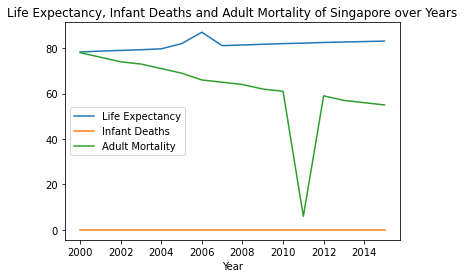

In [39]:
x1 = sg['Year']
y1 = sg['Life expectancy ']
plt.plot(x1, y1, label = 'Life Expectancy')

x2 = sg['Year']
y2 = sg['infant deaths']
plt.plot(x2, y2, label = 'Infant Deaths')

x3 = sg['Year']
y3 = sg['Adult Mortality']
plt.plot(x3, y3, label = 'Adult Mortality')


plt.xlabel('Year')
plt.title('Life Expectancy, Infant Deaths and Adult Mortality of Singapore over Years')
plt.legend()
plt.show()

The first line graph which is the life expectancy would be useful when measure of premature death is needed to show the health condition of the country or comparing with other country across the world. It would also be useful as a reference for the country to appraise whether they should increase their health expenditure in order to improve its average lifespan. 

For the second line graph, which is the infant deaths do not affect much of the life expectancy as it remain constant over years, so it did nothing for the overall increasing trend of life expectancy over years. 

The trend of line graph of adult mortality is decreasing over years, and the life expectancy is increasing. So, we may conclude that the lower the adult mortality, the higher the life expectancy will be. 

As life expectancy is the average age at which people die, so if there is a high infant death and adult mortality rate, it will result in lower values of life expectancy.

# Conclusion

From this assignment, we can see that adult mortality and infant death will affect the life expectancy of a country. Developed country will have higher life expectancy than developed country, this indicates that developed country have better medical and health services as developed country has higher GDP so they can have higher healthcare expenditure and therefore improving the average lifespan. Hence, developing country with lower life expectancy (e.g.< 65), should have increase its healthcare expenditure in order to improve its average lifespan. Besides, country with higher mean schooling rate also have higher life expectancy. This indicates that people with higher education level have more knowledge about how to maintain their health condition and thus, increasing their average lifespan. In conclusion, every country should have pay more attention on their peoples health, improving medical and health services, likewise increasing the schooling rate and take much count of health during education in order to inncrease their people's average life expectancy.